In [1]:
from funcs import get_parc_sizes
from plot_funcs import (get_results, plot_avg_ranks, get_ranks_sizes, get_across_ranks,
                        get_rank_model_order, mean_rank,
                        get_results_df, plot_raw_scores, get_intra_pipeline_df, get_mean_avg_ranks)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Load results
results = get_results('../exp/results')
parc_sizes = get_parc_sizes(everything=True)

static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 64530 Incomplete: 0


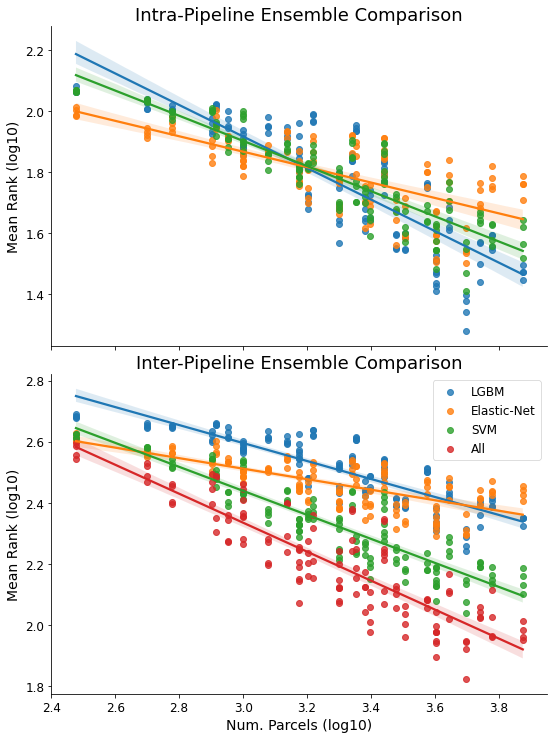

In [3]:
# Make a combined df with both intra and inter
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      threshold=False,
                                      stacked=True, voted=True)
inter_pipe_df = get_across_ranks(results, log=True,
                                 stacked=True, voted=True)

intra_pipe_df['Comparison Type'] = 'Intra-Pipeline'
inter_pipe_df['Comparison Type'] = 'Inter-Pipeline'

combined_df = pd.concat([intra_pipe_df, inter_pipe_df])
combined_df = combined_df.rename(columns={'Mean_Rank': 'Mean Rank',
                                          'Model': 'Pipeline', 'Size': 'Num. Parcels'})
combined_df = combined_df.replace({'lgbm': 'LGBM', 'elastic': 'Elastic-Net',
                                   'svm':'SVM', 'all': 'All'})

g = sns.lmplot(y='Mean Rank', x='Num. Parcels',
               data=combined_df, hue='Pipeline',
               row='Comparison Type', sharey=False,
               aspect=1.5, legend=False)

g.set(xlim=(2.4, 3.95))

sns.set_context("paper", rc={"axes.fontsize":16})  

g.axes[0][0].set_title('Intra-Pipeline Ensemble Comparison', fontsize=18)
g.axes[1][0].set_title('Inter-Pipeline Ensemble Comparison', fontsize=18)

# Set axis attributes / sizes
g.axes[1][0].set_xlabel('Num. Parcels (log10)', fontsize=14)

for i in [0, 1]:
    g.axes[i][0].set_ylabel('Mean Rank (log10)', fontsize=14)
    g.axes[i][0].xaxis.set_tick_params(labelsize=12)
    g.axes[i][0].yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=12)

plt.savefig('Figures/interpipeline_ensemble_comparison.png', dpi=300, bbox_inches='tight')

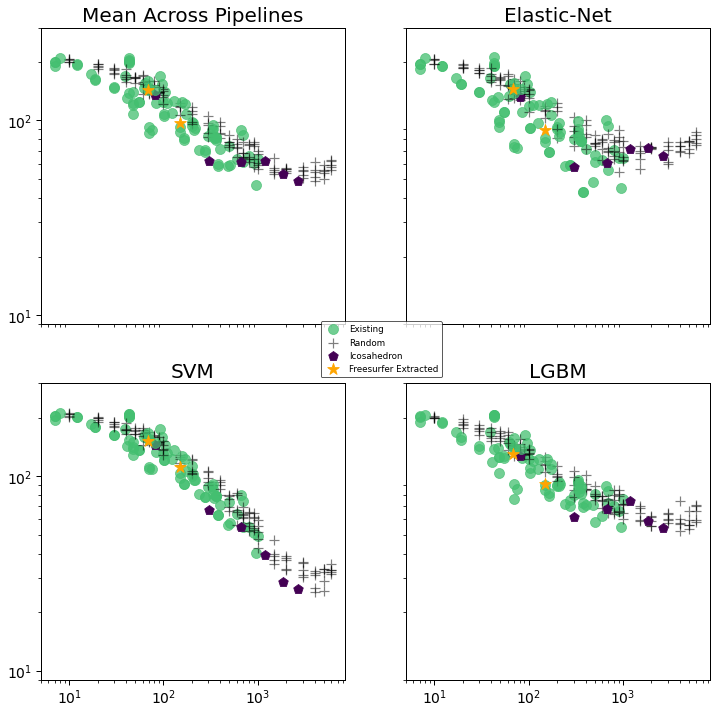

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plot_avg_ranks(results, model='average', ax=axes[0][0], log=True, **static)
handles, labels = axes[0][0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plot_avg_ranks(results, model='elastic',  ax=axes[0][1], log=True, **static)

plot_avg_ranks(results, model='svm', ax=axes[1][0], log=True, **static)
                                                    
plot_avg_ranks(results, model='lgbm', ax=axes[1][1], log=True, **static)

for i in range(2):
    for j in range(2):
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylim(9, 300)
        axes[i][j].get_legend().remove()
        

axes[1][1].legend(by_label.values(), by_label.keys(),
                  bbox_to_anchor=(.132, 1.225), edgecolor='black',
                  framealpha=None)

axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][1].set_yticks([])
axes[0][0].set_xticks([])

plt.savefig('Figures/Intra-Model-Comparison.png', dpi=300)

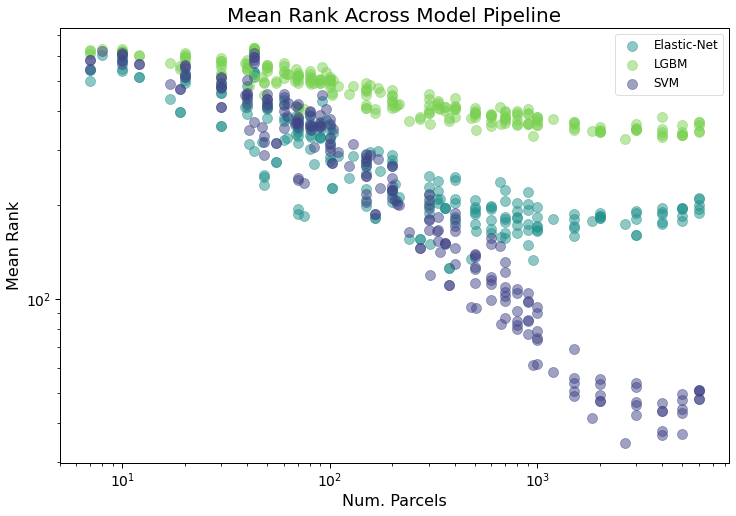

In [5]:
plot_avg_ranks(results, across=True, log=True, **static)
plt.savefig('Figures/Inter-Model-Comparison-Log.png', dpi=300)

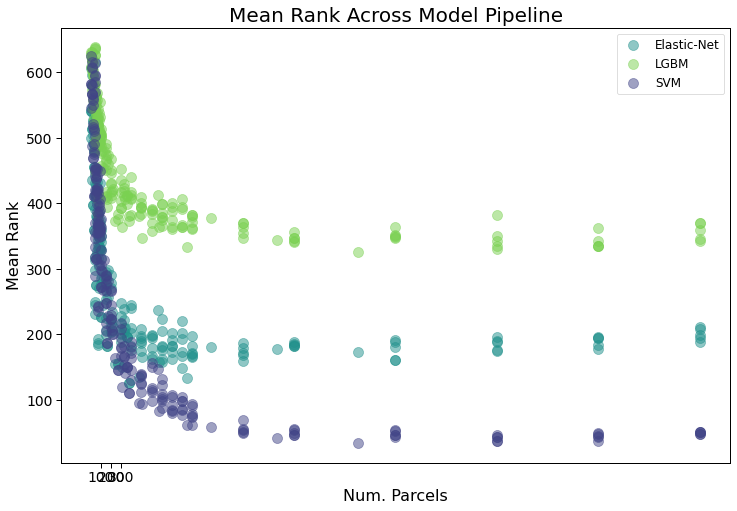

In [6]:
plot_avg_ranks(results, across=True, log=False, **static)
plt.xticks([100, 200, 300])
plt.savefig('Figures/Inter-Model-Comparison.png', dpi=300)

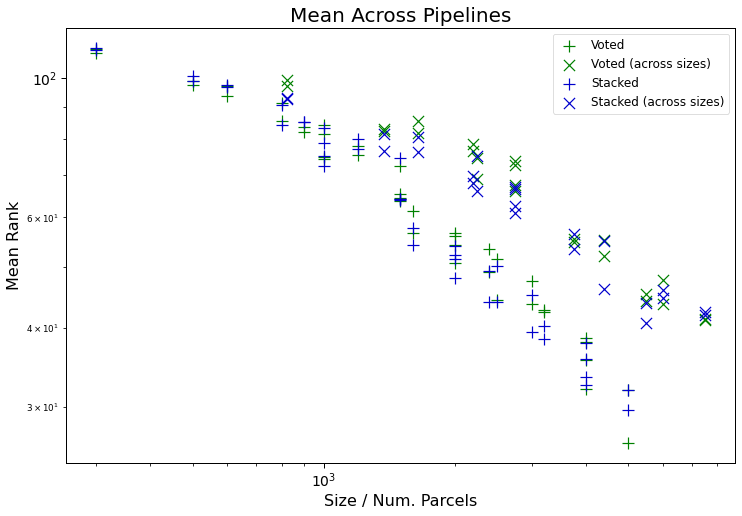

In [7]:
plot_avg_ranks(results, model='average', stacked=True,
               voted=True, sep_dif_sizes=True, log=True)